# Generalized Linear Models (GLM)

## Task
Fit and interpret GLMs (Poisson regression for count data).

## Objective
Understand how GLMs can extend linear models to distributions other than the normal distribution.

## Implementation
We will fit a Poisson regression model to simulated count data to demonstrate the GLM in action.


In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate synthetic count data for Poisson regression
np.random.seed(42)
data = pd.DataFrame({
    'x': np.random.normal(size=100),
    'y': np.random.poisson(lam=2, size=100)
})

# Fit Poisson regression model
poisson_model = smf.glm('y ~ x', data=data, family=sm.families.Poisson()).fit()
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -172.26
Date:                Tue, 22 Oct 2024   Deviance:                       128.93
Time:                        01:49:07   Pearson chi2:                     110.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007226
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6523      0.072      9.002      0.0

## Robust Regression

## Task
Apply robust regression techniques to datasets with outliers using methods like RANSAC and Theil-Sen estimators.

## Objective
Learn methods that are less sensitive to outliers, crucial for datasets that contain noisy or corrupted observations.

## Implementation
We will apply the RANSAC method to handle a dataset with artificially added outliers.


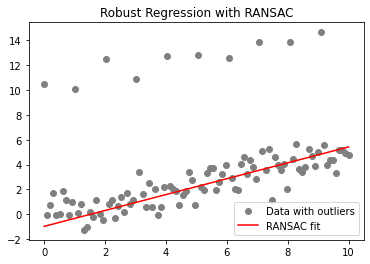

In [2]:

from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# Generate synthetic data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 0.5 * X + np.random.normal(size=X.size)
y[::10] += 10  # Add some outliers

# Apply RANSAC for robust regression
ransac = RANSACRegressor().fit(X.reshape(-1, 1), y)

# Plot the data and the RANSAC fit
plt.scatter(X, y, color='grey', label='Data with outliers')
plt.plot(X, ransac.predict(X.reshape(-1, 1)), color='red', label='RANSAC fit')
plt.legend()
plt.title('Robust Regression with RANSAC')
plt.show()


## Mixed Effects Models

## Task
Analyze data with both fixed and random effects using linear mixed models.

## Objective
Handle hierarchical or grouped data effectively for complex data structures like nested datasets.

## Implementation
We will simulate hierarchical data and apply a mixed-effects model to analyze it.


In [3]:

import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import numpy as np
import pandas as pd

# Generate hierarchical data
np.random.seed(42)
group = np.repeat(np.arange(1, 5), 25)
subgroup = np.tile(np.repeat([1, 2], 25), 2)[:100]
measure = np.random.normal(0, 1, 100) + np.repeat([0, 1, 2, 3], 25)

data = pd.DataFrame({'Group': group, 'Subgroup': subgroup, 'Measure': measure})

# Fit mixed-effects model
model = MixedLM.from_formula('Measure ~ 1', groups='Group', re_formula='~Subgroup', data=data)
result = model.fit()
print(result.summary())


            Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Measure  
No. Observations:    100       Method:               REML     
No. Groups:          4         Scale:                0.8291   
Min. group size:     25        Log-Likelihood:       -139.5852
Max. group size:     25        Converged:            Yes      
Mean group size:     25.0                                     
--------------------------------------------------------------
                     Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept             1.404    0.768 1.828 0.068 -0.102  2.910
Group Var             1.996                                   
Group x Subgroup Cov -0.038                                   
Subgroup Var          0.001                                   



c:\Users\91771\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\91771\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\91771\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
